<center>
    <div style="padding: 20px;
                color: #150d0a;
                margin: 10px;
                font-size: 220%;
                text-align: center;
                display: fill;
                border-radius: 20px;
                border-width: 5px;
                border-style: solid;
                border-color: #150d0a;
                background-color: #f9f9f9;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                font-weight: 500;">
        What makes a successful app? Exploration with Python
    </div>
</center>
<center>
    <div style="padding: 20px;
                color: #150d0a;
                margin: 10px;
                font-size: 150%;
                text-align: center;
                display: fill;
                background-color: #f9f9f9;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                font-weight: 400;">
        When served a dataset on apps from the Google Play store, the Marketing enthusiast in me felt this was a good opportunity to use data analytics to provide my company or a client that wishes to build a new app with the best recipes to a successful app.
    </div>
</center>




# Table of content

* [Introduction](#introduction)
    * [About the dataset](#about-the-dataset)
    * [Dataset description](#dataset-description)
    * [Objectives of the notebook](#objectives-of-the-notebook)
* [Step 1. Data preparation](#step-1-data-preparation)
    * [1.1 Exploring the dataset](#11-exploring-the-dataset)
    * [1.2 Format and types of variables](#12-format-and-types-of-variables)
        * [1.2.1 Correcting values in a row](#121-correcting-values-in-a-row)
        * [1.2.2 Genres: separating values](#122-genres-separating-values)
        * [1.2.3 Size: converting KB to MB](#123-size-converting-kb-to-mb)
        * [1.2.4 Installs: formatting and converting to integer](#124-installs-formatting-and-converting-to-integer)
        * [1.2.5 Type: verification of the classification](#125-type-verification-of-the-classification)
        * [1.2.6 Content rating](#126-content-rating)
        * [1.2.7 App: handling duplicates](#127-app-handling-duplicates)
        * [1.2.8 Category and Genre: overlap and differences](#128-category-and-genre-overlap-and-differences)
    * [1.3 Checking for outliers](#13-checking-for-outliers)
        * [1.3.1 Visualization of outliers](#131-visualization-of-outliers)
        * [1.3.2 Outliers in Reviews](#132-outliers-in-reviews)
        * [1.3.3 Outliers in Installs](#133-outliers-in-installs)
        * [1.3.4 Outliers in Size](#134-outliers-in-size)
        * [1.3.5 Outliers in Price](#135-outliers-in-price)
    * [1.4 Handling missing values](#14-handling-missing-values)
        * [1.4.1 Converting "Varies with device" values as NaN](#141-converting-varies-with-device-values-as-nan)
        * [1.4.2 Identifying NaN](#142-identifying-nan)
        * [1.4.3 Imputation of missing values](#143-imputation-of-missing-values)
* [Step 2. Data exploration](#step-2-data-exploration)
    * [2.1 Free apps vs Paid apps](#21-free-apps-vs-paid-apps)
    * [2.2 Categories and Genres analysis](#22-categories-and-genres-analysis)
        * [2.2.1 Categories vs Rating](#221-categories-vs-rating)
        * [2.2.2 Genres vs Rating](#222-genres-vs-rating)
        * [2.2.3 Categories vs Price](#223-categories-vs-price)
        * [2.2.4 Genres vs Price](#224-genres-vs-price)
        * [2.2.5 Genres vs Size](#225-genres-vs-size)
    * [2.3 Rating vs other variables](#23-rating-vs-other-variables)
        * [2.3.1 Correlation matrix](#231-correlation-matrix)
        * [2.3.2 Rating vs Reviews, Size and Price](#232-rating-vs-reviews-size-and-price)
* [Conclusion](#conclusion)

# Introduction
## About the dataset
* The dataset was retrieved from Kaggle.
* It contains scrapped data from Google Play, the app store for Android devices.


## Dataset description

- **`App`**: Name of the mobile application.
- **`Category`**: Category or genre to which the app belongs.
- **`Rating`**: User rating score of the app.
- **`Reviews`**: Number of user reviews/ratings for the app.
- **`Size`**: Size of the app installation package.
- **`Installs`**: Number of times the app has been installed.
- **`Type`**: Whether the app is free or paid.
- **`Price`**: Price of the app if it's paid; otherwise, '0' or 'Free'.
- **`Content Rating`**: Content rating indicating suitability for different age groups.
- **`Genres`**: Specific genres or themes associated with the app.
- **`Last Updated`**: Date when the app was last updated.
- **`Current Ver`**: Current version of the app.
- **`Android Ver`**: Minimum required Android version to run the app.

## Objective of the notebook
* Analyzing the state of the Android apps market.
* Identifying the best performing apps.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.express import pie
import warnings
warnings.filterwarnings("ignore")

# Step 1. Data preparation
## 1.1 Exploring the dataset

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
# Remove Current Ver and Android Ver variables that won't have significance for further analysis
df = df.drop(['Current Ver', 'Android Ver'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


## 1.2 Format and types of variables
Several issues arise when attempting to convert variable to their appropriate type.

### 1.2.1 Correcting values in a row

In [4]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [5]:
df.loc[df['Installs'] == "Free"]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated  
10472       1.0.19

All values on this row shifted to the left and should be fixed.

This leaves a gap in Category. By looking for more information on this app, I found that it is a photo frame app, so I reattribute its category as "LIFESTYLE" and genre as "House & Home".

In [6]:
row_index = 10472

row_values = df.iloc[row_index].tolist()

# Shift all values to the right, except for the value in the "App" column
shifted_row_values = [row_values[0]] + row_values[-1:] + row_values[1:-1]

# Assign the modified row values back to df
df.iloc[row_index] = shifted_row_values

# Change its Category to LIFESTYLE and Genre to "House & Home"
new_category_value = 'LIFESTYLE'
new_genre_value = 'House & Home'
df.at[row_index, 'Category'] = new_category_value
df.at[row_index, 'Genres'] = new_genre_value

df.loc[row_index]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                        LIFESTYLE
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                       House & Home
Last Updated                            February 11, 2018
Name: 10472, dtype: object

In [7]:
# Convert variables to their appropriate type
df['Category'] = df['Category'].astype('category')
df['Rating'] = df['Rating'].astype(float)
df['Reviews'] = df['Reviews'].astype(int)
df['Type'] = df['Type'].astype('category')
df['Content Rating'] = df['Content Rating'].astype('category')
df['Genres'] = df['Genres'].astype('category')
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float) #Remove "$" and ","
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  category      
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int32         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  category      
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  category      
 9   Genres          10841 non-null  category      
 10  Last Updated    10841 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 599.6+ KB


### 1.2.2 Genres: separating values
Several genres are currently fitted into one variable, I will separate them into different columns and convert them as category types.

In [8]:
#Split Genres values in as many columns as needed
split_genres = df['Genres'].str.split(';', expand=True)

for i in range(split_genres.shape[1]):
  df[f'Genre_{i+1}'] = split_genres[i]

genre_columns = [col for col in df.columns if col.startswith('Genre')]

# Change all genre columns to category type
for col in genre_columns:
  df[col] = df[col].astype('category')

# Replace NaN values in 'Genre_2' with None
df['Genre_2'] = df['Genre_2'].astype('object')
df['Genre_2'].fillna(value='None', inplace=True)
df['Genre_2'] = df['Genre_2'].astype('category')

print(df[genre_columns].dtypes)

# Delete Genres column
df = df.drop('Genres', axis=1)

print(df.head())

Genres     category
Genre_1    category
Genre_2    category
dtype: object
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type  Price Content Rating Last Updated  \
0      159   19M      10,000+  Free    0.0       Everyone   2018-01-07   
1      967   14M     500,000+  Free    0.0       Everyone   2018-01-15   
2    87510  8.7M   5,000,000+  Free    0.0       Everyone   2018-08-01   
3   215644   25M  50,000,000+  Free    0.0           Teen   2018-06-08   
4      967  2.8M     100,000+  Free    0.0       Everyone   2018-06-20   



### 1.2.3 Size: converting KB to MB

Values in Size are listed in kilobytes (KB) and megabytes (MB). For an easier analysis later, I will convert the KB to MB.
Since, 1MB=1024KB, I will divide the KB by 1024.

In [9]:
def convert_size_to_mb(size):
    if isinstance(size, float): 
        return size  
    elif size.endswith('M'): 
        return float(size[:-1]) 
    elif size.endswith('k'):  
        return float(size[:-1]) / 1024 
    else:
        return None 

df['Size_MB'] = df['Size'].apply(convert_size_to_mb)

# Create two dataset to identify converted kilobytes and converted megabytes
df_k = df[df['Size'].str.contains('k', na=False)]
df_m = df[df['Size'].str.contains('M', na=False)]

print("Rows where 'Size' contains 'k':")
print(df_k[['App', 'Size', 'Size_MB']].head())
print("Rows where 'Size' contains 'M':")
print(df_m[['App', 'Size', 'Size_MB']].head())

Rows where 'Size' contains 'k':
                               App  Size   Size_MB
58               Restart Navigator  201k  0.196289
209                Plugin:AOT v5.0   23k  0.022461
384  Hangouts Dialer - Call Phones   79k  0.077148
450                    Caller ID +  118k  0.115234
458                    GO Notifier  695k  0.678711
Rows where 'Size' contains 'M':
                                                 App  Size  Size_MB
0     Photo Editor & Candy Camera & Grid & ScrapBook   19M     19.0
1                                Coloring book moana   14M     14.0
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  8.7M      8.7
3                              Sketch - Draw & Paint   25M     25.0
4              Pixel Draw - Number Art Coloring Book  2.8M      2.8


In [10]:
# Removing column Size and changing the name of Size_MB to Size
df = df.drop('Size', axis=1)
df = df.rename(columns={'Size_MB': 'Size'})

Values in megabytes have been appropriately formatted, and values in kilobytes appropriately formatted and converted.

### 1.2.4 Installs: formatting and converting to integer
A range is given for the number of installs:
- I will remove the "+" and ",",
- which will allow me to convert it to integers.

In [11]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

### 1.2.5 Type: verification of the classification

In [12]:
# Display apps that are Free but with a price that is not 0
df_not_free = df[(df['Type'] == 'Free') & (df['Price'] != 0)]['Price']
print('Apps as "Free" type but a price that is not 0:', df_not_free)

Apps as "Free" type but a price that is not 0: Series([], Name: Price, dtype: float64)


In [13]:
# Display apps that are Paid but  witha price that is 0
df_not_paid = df[(df['Type'] == 'Paid') & (df['Price'] == 0)]['Price']
print('Apps as "Paid" with a price of 0:', df_not_paid)

Apps as "Paid" with a price of 0: Series([], Name: Price, dtype: float64)


### 1.2.6 Content rating

In [14]:
content_rating_counts = df['Content Rating'].value_counts()

print(content_rating_counts)

Content Rating
Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64


As most apps are rated for “Everyone”, this variable may not be very useful for analysis. This suggests that apps are generally not targeted at anyone under the age of 10.

### 1.2.7 App: handling duplicates

In [15]:
duplicates = df[df.duplicated('App')]['App']

print(duplicates)

229            Quick PDF Scanner + OCR FREE
236                                     Box
239                      Google My Business
256                     ZOOM Cloud Meetings
261               join.me - Simple Meetings
                        ...                
10715                    FarmersOnly Dating
10720    Firefox Focus: The privacy browser
10730                           FP Notebook
10753        Slickdeals: Coupons & Shopping
10768                                  AAFP
Name: App, Length: 1181, dtype: object


In [16]:
grouped = df.groupby('App')

total_changes = {}

for name, group in grouped:
    for col in group.columns:
        if col != 'App':
            unique_values = group[col].unique()
            if len(unique_values) > 1:
                if col in total_changes:
                    total_changes[col] += len(unique_values)
                else:
                    total_changes[col] = len(unique_values)

for col, count in total_changes.items():
    print(f"{col} changed {count} times across all dupplicated apps")


Reviews changed 1207 times across all dupplicated apps
Category changed 170 times across all dupplicated apps
Last Updated changed 86 times across all dupplicated apps
Rating changed 36 times across all dupplicated apps
Installs changed 30 times across all dupplicated apps
Size changed 36 times across all dupplicated apps
Genre_1 changed 11 times across all dupplicated apps
Genre_2 changed 8 times across all dupplicated apps
Type changed 4 times across all dupplicated apps
Price changed 4 times across all dupplicated apps


In [17]:
# Function to aggregate by dupplicated values
def aggregate_rows(data):
    if data.dtype.name == 'category':
        return data.mode()[0] if len(data.mode()) > 0 else np.random.choice(data)
    elif np.issubdtype(data.dtype, np.number):
        if data.nunique() == 1:
            return data.iloc[0]
        else:
            return data.mean()
    else:
        return data.mode()[0] if len(data.mode()) > 0 else np.random.choice(data)

df_dup = df.groupby('App').agg(aggregate_rows).reset_index()
duplicates_dup = df_dup[df.duplicated('App')]['App']

print(len(duplicates_dup))

1139


In [18]:
# Change variables back to int
df = df_dup
df['Reviews'] = df['Reviews'].astype('int64') 
df['Installs'] = df['Installs'].astype('int64') 

Of the 10,841 values in the App, 1,181 were duplicates.

Not every duplicated App had different values in other variables. However, when this was the case, it was predominantly in Reviews.

I applied a function that:
* For numerical variables, replaces by an average or by the mode (the most occurring value).
* For non-numerical values, replaces by the mode or a random one.

The new dataframe, without duplicated Apps, contains 9,660 entries. This confirms the success of the function, as 10,841 minus 1,181 equals 9,660.

### 1.2.8 Category and Genre: overlap and differences

In [19]:
categories = df['Category'].unique()
print('List of categories:', list(categories))
print('List of genres:', pd.concat([df['Genre_1'], df['Genre_2']]).unique())

List of categories: ['SPORTS', 'SOCIAL', 'COMICS', 'TOOLS', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY', 'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING', 'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY', 'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN', 'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME', 'MAPS_AND_NAVIGATION', 'ENTERTAINMENT', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES', 'WEATHER', 'BEAUTY', 'LIBRARIES_AND_DEMO', 'PARENTING']
List of genres: ['Sports' 'Social' 'Comics' 'Tools' 'Communication' 'News & Magazines'
 'Health & Fitness' 'Education' 'Books & Reference' 'Puzzle' 'Lifestyle'
 'Business' 'Shopping' 'Medical' 'Board' 'Finance' 'Action'
 'Personalization' 'Casual' 'Arcade' 'Photography' 'Travel & Local'
 'Entertainment' 'Dating' 'Productivity' 'Art & Design' 'Simulation'
 'Food & Drink' 'Video Players & Editors' 'Racing' 'Adventure'
 'House & Home' 'Maps & Navigation' 'Events' 'Educational' 'Casino' 

In [20]:
# Format both variables similarly and compare the overlap
categories_set = set([category.replace('_', ' ').title() for category in categories])
genres_set = set(pd.concat([df['Genre_1'], df['Genre_2']]).unique())

overlap = categories_set & genres_set

print('Overlap between categories and genres:', list(overlap))

Overlap between categories and genres: ['Business', 'Finance', 'Productivity', 'Parenting', 'Comics', 'Sports', 'Personalization', 'Social', 'Education', 'Photography', 'Lifestyle', 'Beauty', 'Entertainment', 'Tools', 'Communication', 'Events', 'Medical', 'Dating', 'Shopping', 'Weather']


In [21]:
# Check if all categories are in genre
all_categories_in_genres = categories_set.issubset(genres_set)

print('Are all categories also in genres?', all_categories_in_genres)

Are all categories also in genres? False


While some categories may also appear in genres, genres will offer a higher level of detail.

## 1.3 Checking for outliers
#### 1.3.1 Visualization of outliers

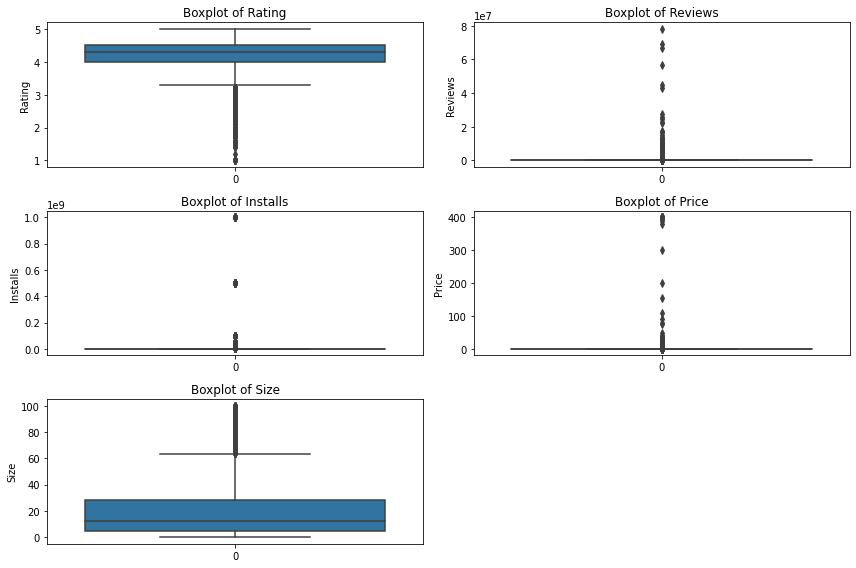

In [22]:
# Select only numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(len(numerical_columns.columns)//2 + 1, 2, i+1)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()

#### 1.3.2 Outliers in Reviews

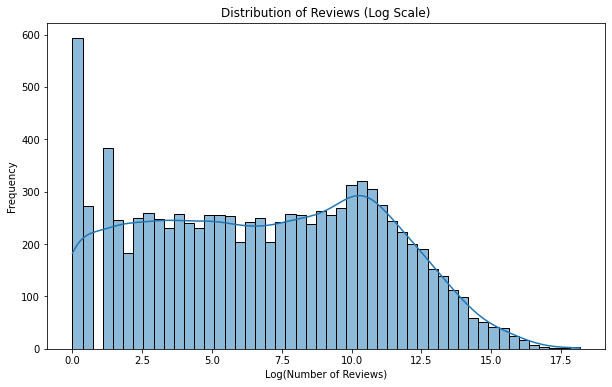

In [23]:
# Apply a logarithmic transformation for an enhanced visualization of the Reviews distribution
df_log_reviews = df.copy()
df_log_reviews['Log_Reviews'] = np.log1p(df['Reviews'])

# Plot the distribution of log-transformed reviews
plt.figure(figsize=(10, 6))
sns.histplot(df_log_reviews['Log_Reviews'], bins=50, kde=True)
plt.xlabel('Log(Number of Reviews)')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews (Log Scale)')
plt.show()

In [24]:
# Filter apps with 0 reviews
apps_with_0_reviews = df[df['Reviews'] == 0]

total_apps = len(df)

share_0_reviews = (len(apps_with_0_reviews) / total_apps) * 100
share_other_reviews = 100 - share_0_reviews

print(f"Share of apps with 0 reviews: {share_0_reviews:.2f}%")
print(f"Share of apps with reviews other than 0: {share_other_reviews:.2f}%")

Share of apps with 0 reviews: 6.14%
Share of apps with reviews other than 0: 93.86%


In [25]:
# Display apps with the highest number of reviews
top_20_reviews = df.sort_values(by='Reviews', ascending=False).head(20)[['App', 'Reviews']]
print("Top 20 in number of reviews:")
print(top_20_reviews)

Top 20 in number of reviews:
                                                    App   Reviews
4328                                           Facebook  78143257
9042                                 WhatsApp Messenger  69116101
5399                                          Instagram  66560497
6166           Messenger – Text and Video Chat for Free  56644090
2564                                     Clash of Clans  44889695
2573            Clean Master- Space Cleaner & Antivirus  42916526
8080                                     Subway Surfers  27721993
9226                                            YouTube  25639426
7722  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
2561                                       Clash Royale  23132574
2364                                   Candy Crush Saga  22427590
8673        UC Browser - Fast Download Private & Secure  17713564
7890                                           Snapchat  17011252
55      360 Security - Free Antivirus, Booster,

What may initially appear as outliers in the Reviews are actually the most popular applications from Meta (formerly Facebook). These apps have a significantly higher number of reviews due to their widespread usage and popularity. It's a common occurrence in data analysis where popular items can seem like outliers. It's always important to understand the context of the data.

In [26]:
# Filter apps with 1 or 0 reviews
zero_review_apps = df[df['Reviews'] <= 1]

# Count the number of apps with 1 or 0 reviews
num_zero_reviews = zero_review_apps.shape[0]

print("Number of apps with 1 or 0 reviews:", num_zero_reviews)

Number of apps with 1 or 0 reviews: 865


In [27]:
print('List of number of Installs:', zero_review_apps['Installs'].unique())
print('List of ratings:', zero_review_apps['Rating'].unique())

List of number of Installs: [      5     500      10      50     100    1000       0       1   50000
 1000000   10000  100000    5000]
List of ratings: [nan  5.  1.  4.  3.  2.]


This data suggests that users have the option to rate an app without necessarily leaving a review. Consequently, we can only quantify the number of reviews, not the total number of ratings.

It’s plausible that if the app was recently launched, early adopters might have rated it without leaving a review. This is a common behavior among users who are still exploring the features of a new app.

However, it would indeed be unusual to observe a high number of installs with no reviews. This could potentially indicate issues with the review system or user engagement strategies of the app. It’s always crucial to consider these factors when analyzing app performance data.

In [28]:
zero_review_high_installs = zero_review_apps[zero_review_apps['Installs'] >= 1000].sort_values(by='Installs', ascending=False)
print(zero_review_high_installs[['App', 'Rating', 'Installs']])

                                                    App  Rating  Installs
724                           Android TV Remote Service     NaN   1000000
6646                     Nougat Android 7 Launcher : AW     NaN    100000
4061                               Explora con el Chavo     NaN    100000
7811                        Simple x3DS Emulator - BETA     NaN     50000
357                                   AQ: First Contact     NaN     50000
358                                       AR Dragon Pet     NaN     50000
3103                                                 DW     NaN     10000
6930  Period Tracker, Pregnancy Calculator & Calendar 🌸     NaN     10000
9326                                         ai.Bot Box     NaN     10000
8442                              Theme for Android 7.0     NaN      5000
5554                                         KeePass DX     NaN      5000
792   Apps for SportsBєtting.ag - Bitcoin Welcome here!     NaN      1000
5426                                  

This analysis suggests two possibilities:
* There might be a data loss in the Reviews section.
* There could be anomalies in the Installs data.

Given that we can’t delve deeper into this (since it’s impossible to determine if they were just released without a release date), and considering that their number is low, it seems reasonable not to remove these entries. This approach allows us to preserve as much data as possible for our analysis.

#### 1.3.3 Outliers in Installs
The number of installs having been converted from a range to a number, I will display all apps with the highest number of installs.

In [29]:
filtered_installs_df = df[df['Installs'] == 1000000000][['App', 'Installs']]
print(filtered_installs_df)

                                           App    Installs
4328                                  Facebook  1000000000
4869                                     Gmail  1000000000
4912                                    Google  1000000000
4921              Google Chrome: Fast & Secure  1000000000
4924                              Google Drive  1000000000
4933                               Google News  1000000000
4937                             Google Photos  1000000000
4938                         Google Play Books  1000000000
4939                         Google Play Games  1000000000
4940                   Google Play Movies & TV  1000000000
4944                        Google Street View  1000000000
4949                                   Google+  1000000000
5118                                  Hangouts  1000000000
5399                                 Instagram  1000000000
6051                 Maps - Navigate & Explore  1000000000
6166  Messenger – Text and Video Chat for Free  10000000

These are again app from GAFAM: Google (Alphabet), Facebook (Meta) and Microsoft. 
The only other one, Subway Surfers, was the most downloaded game of the last decade (source: [App Annie](http://https://www.businessinsider.com/most-downloaded-games-of-decade-subway-surfers-to-fruit-ninja-2019-12)).

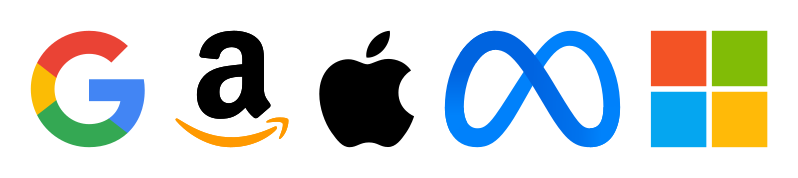

#### 1.3.4 Outliers in Size

In [30]:
size_array = df['Size'].sort_values().values
print(size_array)

[0.00830078 0.01074219 0.01367188 ...        nan        nan        nan]


In [31]:
# Display top values
top_20_size = df.sort_values(by='Size', ascending=False).head(20)[['App', 'Size']]
print("Top 20 in size:")
print(top_20_size)

Top 20 in size:
                                                    App   Size
6537                               Navi Radiography Pro  100.0
6217                  Mini Golf King - Multiplayer Game  100.0
8247                     Talking Babsy Baby: Baby Games  100.0
2380   Car Crash III Beam DH Real Damage Simulator 2018  100.0
7111                                          Post Bank  100.0
4802                       Gangster Town: Vice District  100.0
8041                      Stickman Legends: Shadow Wars  100.0
8720                                    Ultimate Tennis  100.0
8815                                         Vi Trainer  100.0
8412                        The Walking Dead: Our World  100.0
3433                         Draft Simulator for FUT 18  100.0
6180                              Miami crime simulator  100.0
7801                                    SimCity BuildIt  100.0
5283                             Hungry Shark Evolution  100.0
9186  Xtreme Racing 2018 - Jeep & 4x4 o

In [32]:
most_recent_date = df['Last Updated'].max()
print(most_recent_date)

2018-08-08 00:00:00


Around 2018, 100MB was indeed the maximum storage allowed for APKs (source: [Android Developers Blog](http://https://android-developers.googleblog.com/2015/09/support-for-100mb-apks-on-google-play.html?linkId=17389452)).

#### 1.3.5 Outliers in Price

In [33]:
# Display top values in Price
top_50_price = df.sort_values(by='Price', ascending=False).head(50)[['App', 'Price', 'Installs']]
print("Top 50 in Price:")
print(top_50_price)

Top 50 in Price:
                                                    App   Price  Installs
5327                           I'm Rich - Trump Edition  400.00     10000
5319                                         I am Rich!  399.99      1000
5317                                     I am Rich Plus  399.99     10000
5322                     I am rich (Most expensive app)  399.99      1000
5321                                          I am rich  399.99    100000
5298                                 I AM RICH PRO PLUS  399.99      1000
5324                                 I am rich(premium)  399.99      5000
5328                  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99         0
5301                                  I Am Rich Premium  399.99     50000
5302                                      I Am Rich Pro  399.99      5000
9656                                         💎 I'm rich  399.99     10000
9540                             most expensive app (H)  399.99       100
5315                 

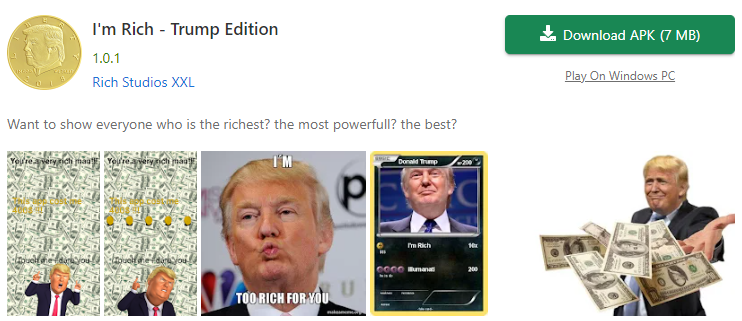


What started as a joke in 2008 ([an useless app at an extremely high price, quickly removed from the App Store](http://https://en.wikipedia.org/wiki/I_Am_Rich)) has been replicated in different versions found here on Google Play at the time the data was scrapped. 
* The number of installs for those apps, if true, is appalling.
* The price cap on Google Play was 400 USD until late 2015 but is now 999.99 USD (source: [Android Authority](http://https://www.androidauthority.com/google-play-store-1000-price-limit-3445833/)).
* The latest update of an app in the dataset being in August 2018, coupled with the number of installs, does raise questions about the accuracy of the data.
* These meme apps should be removed from the dataframe as they may not provide an accurate representation of the market.

In [34]:
# Drop the meme apps from the df
meme_apps_df = df[df['Price'] < 299.99]
df = meme_apps_df

## 1.4 Handling missing values
### 1.4.1 Converting "Varies with device" values as NaN
Values that read as “varies with device” should be considered as missing values. It’s interesting to note that we only find them in variables related to technical aspects. Regardless, they will be converted to NaN.

In [35]:
# Calculate the percentage of 'Varies with device' per total values for each column
percentages = {}
for column in df.columns:
    if df[column].dtype == 'object':
        total_values = len(df[column]) 
        varies_count = (df[column] == 'Varies with device').sum()  
        percentage = (varies_count / total_values) * 100  
        percentages[column] = percentage

for column, percentage in percentages.items():
    print(f"% of 'Varies with device' in {column}: {percentage:.2f}%")

% of 'Varies with device' in App: 0.00%
% of 'Varies with device' in Category: 0.00%
% of 'Varies with device' in Type: 0.00%
% of 'Varies with device' in Content Rating: 0.00%
% of 'Varies with device' in Genre_1: 0.00%
% of 'Varies with device' in Genre_2: 0.00%


In [36]:
# Convert as NaN
df.replace('Varies with device', np.nan, inplace=True)

### 1.4.2 Identifying NaN

In [37]:
# Calculate the share of NaN values against total in each column
nan_share = (df.isna().sum() / len(df))*100

print("% of NaN values in each variable:")
print(nan_share)

% of NaN values in each variable:
App                0.000000
Category           0.000000
Rating            15.150887
Reviews            0.000000
Installs           0.000000
Type               0.010370
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Genre_1            0.000000
Genre_2            0.000000
Size              12.724256
dtype: float64


In [38]:
# Create a dataframe without NaN
df_cleaned = df.dropna()

# Calculate the number of entries in each dataset
num_entries_df = len(df)
num_entries_df_cleaned = len(df_cleaned)
num_entries_removed = num_entries_df - num_entries_df_cleaned
percentage_removed = (num_entries_removed * 100) / num_entries_df

print("Number of entries in df:", num_entries_df)
print("Number of entries in df_cleaned:", num_entries_df_cleaned)
print("% of entries removed after cleaning:", percentage_removed)

Number of entries in df: 9643
Number of entries in df_cleaned: 7013
% of entries removed after cleaning: 27.273670019703413


The prospect of losing almost 30% of the initial dataset can be daunting. However, only 15% of these are in the Rating category, which is the variable we will predict.

### 1.4.3 Imputation of missing values
The percentage of missing values in categories being low, I decide to use the simplest method of imputation by mean or median:
* mean if the data has a normal distribution
* median if the data has a skewed distribution

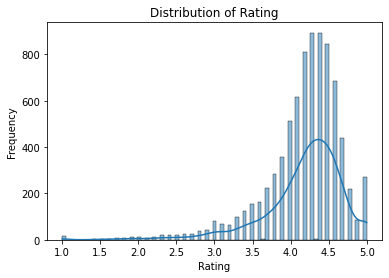

In [39]:
# Distribution of Rating
sns.histplot(df['Rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')
plt.show()

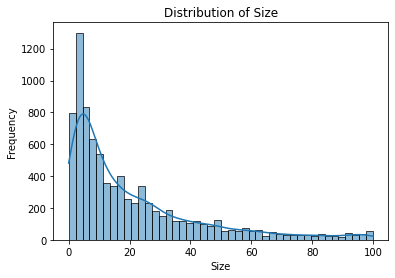

In [40]:
# Distribution of Size
sns.histplot(df['Size'], kde=True)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Distribution of Size')
plt.show()

In [41]:
# Imputation by median as Size and Rating distributions are skewed
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Size'] = df['Size'].fillna(df['Size'].median())

In [42]:
# Calculate the share of NaN values against total in each column
nan_share_imp = (df.isna().sum() / len(df))*100

# Print the share of NaN values for each column
print("% of NaN values in each variable:")
print(nan_share_imp)

% of NaN values in each variable:
App               0.00000
Category          0.00000
Rating            0.00000
Reviews           0.00000
Installs          0.00000
Type              0.01037
Price             0.00000
Content Rating    0.00000
Last Updated      0.00000
Genre_1           0.00000
Genre_2           0.00000
Size              0.00000
dtype: float64


# Step 2. Data exploration

## 2.1 Free apps vs Paid apps

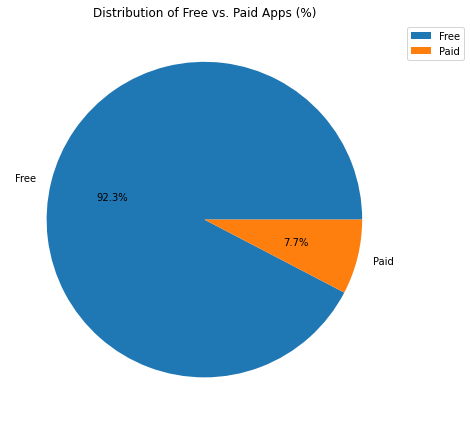

In [43]:
# Count occurrences of "Free" and "Paid" types
free_count = df[df['Type'] == 'Free'].shape[0]
paid_count = df[df['Type'] == 'Paid'].shape[0]

# Calculate percentages
total_count = len(df)
free_percentage = (free_count / total_count) * 100
paid_percentage = (paid_count / total_count) * 100

plt.figure(figsize=(8, 6)) 
plt.pie([free_percentage, paid_percentage], labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.title('Distribution of Free vs. Paid Apps (%)')
plt.gca().set_prop_cycle('color', ['blue', 'green']) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()

plt.show()

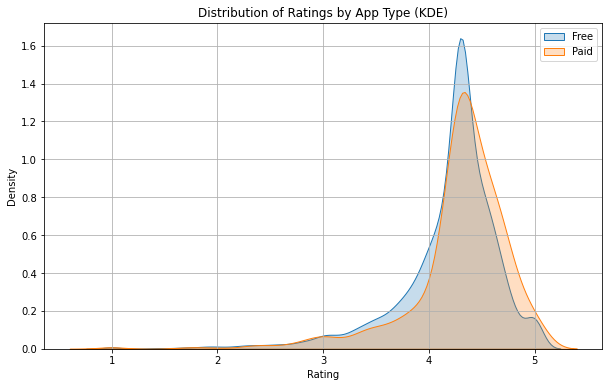

In [44]:
# Rating per type of app
free_ratings = df[df['Type'] == 'Free']['Rating']
paid_ratings = df[df['Type'] == 'Paid']['Rating']

plt.figure(figsize=(10, 6))
sns.kdeplot(free_ratings, label='Free', shade=True)
sns.kdeplot(paid_ratings, label='Paid', shade=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings by App Type (KDE)')
plt.legend()
plt.grid(True)
plt.show()

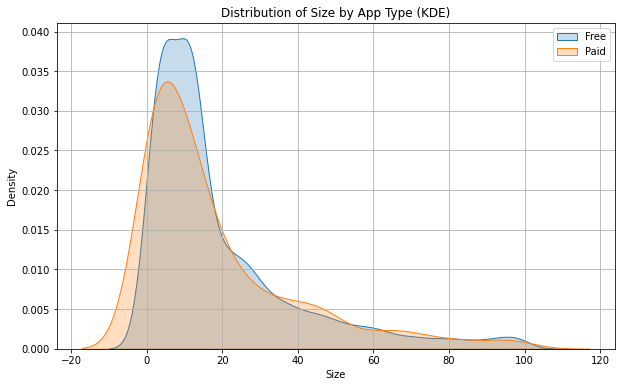

In [45]:
# Size per type of app
free_size = df[df['Type'] == 'Free']['Size']
paid_size = df[df['Type'] == 'Paid']['Size']

plt.figure(figsize=(10, 6))
sns.kdeplot(free_size, label='Free', shade=True)
sns.kdeplot(paid_size, label='Paid', shade=True)
plt.xlabel('Size')
plt.ylabel('Density')
plt.title('Distribution of Size by App Type (KDE)')
plt.legend()
plt.grid(True)
plt.show()

* 92,3 % of apps are Free.
* Both types are concentrated around a 4,5 rating, but Paid apps are more likely to receive a wider range of ratings.
* Most apps of both types are of a small size, but paid apps tend to be larger (users usually expect more features and content from paid apps).

## 2.2 Categories and Genres analysis

### 2.2.1 Categories vs Rating

In [46]:
total_count = len(df)
category_percentages = (df['Category'].value_counts() / total_count) * 100

# Create the pie chart with percentages
fig = pie(category_percentages, names=category_percentages.index, 
          values=category_percentages, title='Distribution of apps per category (%)')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(width=900, height=700)

fig.show()

FAMILY, GAME and TOOLS categories account for almost 40% of all apps.

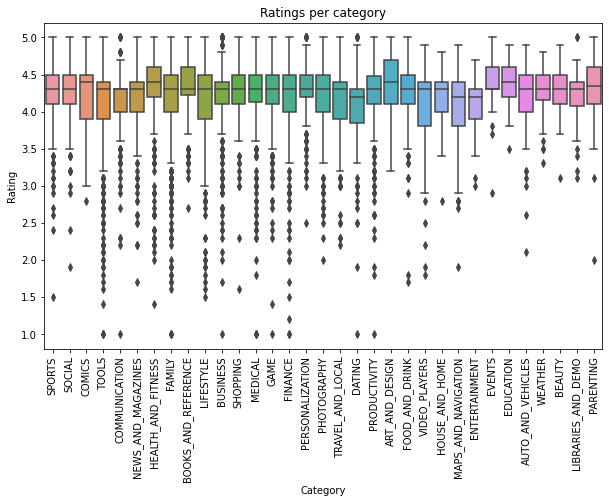

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Ratings per category')
plt.xticks(rotation=90)
plt.show()

Rating seems fairly distributed accross genres.

In [48]:
# Function to calculate median rating and interquartile range (IQR) for each category
def calculate_stats(group):
  return pd.Series({
      'median_rating': group['Rating'].median(),
      'IQR': group['Rating'].quantile(0.75) - group['Rating'].quantile(0.25),})

category_stats = df.groupby('Category').apply(calculate_stats)

# Sort by median rating and then by IQR
sorted_categories = category_stats.sort_values(by=['median_rating', 'IQR'], ascending=[False, True])

print("Ranking of categories by median rating and IQR:")
print(sorted_categories)

Ranking of categories by median rating and IQR:
                     median_rating    IQR
Category                                 
EDUCATION                     4.40  0.400
HEALTH_AND_FITNESS            4.40  0.400
COMICS                        4.40  0.600
ART_AND_DESIGN                4.40  0.600
PARENTING                     4.35  0.500
COMMUNICATION                 4.30  0.300
EVENTS                        4.30  0.300
PERSONALIZATION               4.30  0.300
BUSINESS                      4.30  0.300
LIBRARIES_AND_DEMO            4.30  0.325
WEATHER                       4.30  0.350
BOOKS_AND_REFERENCE           4.30  0.375
MEDICAL                       4.30  0.375
PRODUCTIVITY                  4.30  0.375
BEAUTY                        4.30  0.400
FOOD_AND_DRINK                4.30  0.400
GAME                          4.30  0.400
HOUSE_AND_HOME                4.30  0.400
NEWS_AND_MAGAZINES            4.30  0.400
SHOPPING                      4.30  0.400
SOCIAL                      

Best performing app categories will have a high user satisfaction (high median) but also a more consistent user satisfaction (low IQR). 

In other terms, you'll be more likely to have a high rating, and less likely to have a low rating in these categories:
* HEALTH_AND_FITNESS and EDUCATION (median=4.4, IQR=0.400)
* PARENTING (median=4.35, IQR=0.500)
* MEDICAL, PRODUCTIVITY, BOOKS_AND_REFERENCE, WEATHER (median=4.3, IQR<=0.375)
* LIBRARIES_AND_DEMO, BUSINESS, PERSONALIZATION, EVENTS, COMMUNICATION (median=4.3, IQR=0.300)

But you should avoid categories like:
* DATING (median=4.2, IQR=0.450)
* ENTERTAINMENT (median=4.20, IQR=0.400)
* MAPS_AND_NAVIGATION (median=4.2, IQR=0.600)

### 2.2.2 Genres vs Rating

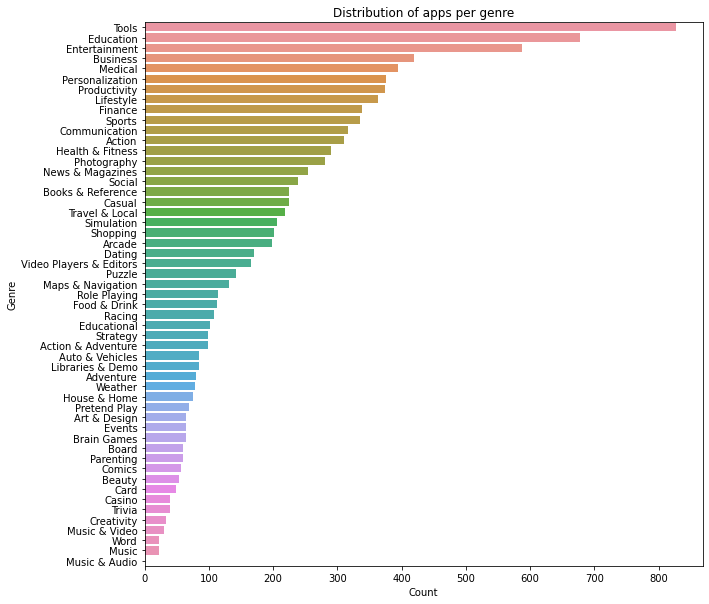

In [49]:
# Combine Genre_1 and Genre_2 into a single Series
genres = pd.concat([df['Genre_1'], df['Genre_2']]).reset_index(drop=True)
genres = genres[genres != 'None']

plt.figure(figsize=(10,10))
sns.countplot(y=genres, order=genres.value_counts().index)
plt.title('Distribution of apps per genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [50]:
df_genres = df.copy()

# Combine Genre_1 and Genre_2 into a list, excluding 'None' in Genre_2
df_genres['Genres'] = df_genres.apply(lambda row: [row['Genre_1']] + ([row['Genre_2']] if row['Genre_2'] != 'None' else []), axis=1)

# Flatten the df to have one value per genre per app
df_flat = df_genres[['Rating', 'Genres', 'Category', 'Price', 'Size', 'Type']].explode('Genres').reset_index(drop=True)

# Calculate the count for each combination of Category and Genres
df_counts = df_flat.groupby(['Category', 'Genres']).size().reset_index(name='count')

# Create lists for source, target and value for Sankey diagram
source = df_counts['Category'].tolist()
target = df_counts['Genres'].tolist()
value = df_counts['count'].tolist()

# Create unique labels
labels = list(pd.unique(source + target))

# Create indices for source and target
source_indices = [labels.index(x) for x in source]
target_indices = [labels.index(x) for x in target]

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=value,
    )
))

fig.update_layout(
    title_text="Sankey Diagram of genres within each category",
    font_size=10,
    height=1300 
)
fig.show()

While most genres are typically represented only within their respective categories (for example, ‘Social’ in ‘SOCIAL’), the two largest categories, ‘FAMILY’ and ‘GAME’, are more widely distributed. They are spread across 29 and 18 genres, respectively.

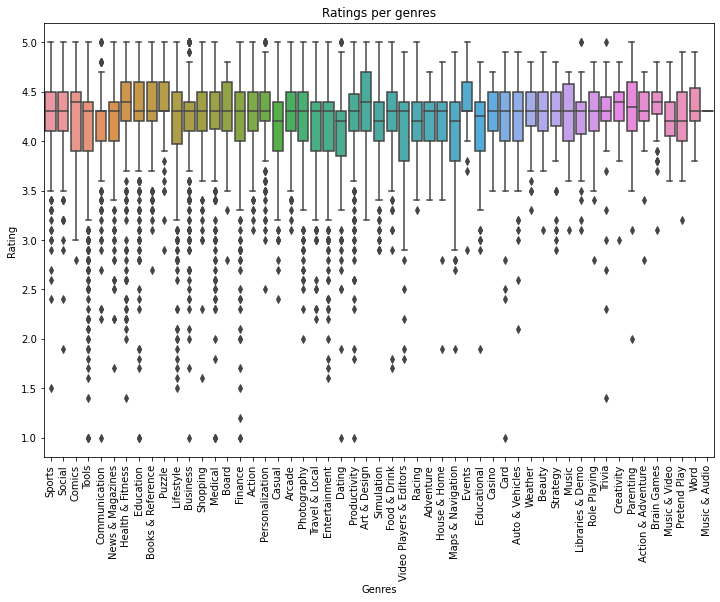

In [51]:
# Box plot of ratings per genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genres', y='Rating', data=df_flat)
plt.xticks(rotation=90)
plt.title('Ratings per genres')
plt.show()

In [52]:
genre_stats = df_flat.groupby('Genres').apply(calculate_stats)

# Sort by median rating and then by IQR
sorted_genre = genre_stats.sort_values(by=['median_rating', 'IQR'], ascending=[False, True])

print("Ranking of genres by median rating and IQR:")
print(sorted_genre)

Ranking of genres by median rating and IQR:
                         median_rating     IQR
Genres                                        
Brain Games                       4.40  0.2250
Creativity                        4.40  0.3000
Health & Fitness                  4.40  0.4000
Comics                            4.40  0.6000
Art & Design                      4.40  0.6000
Parenting                         4.35  0.5000
Music & Audio                     4.30  0.0000
Trivia                            4.30  0.2500
Action & Adventure                4.30  0.3000
Communication                     4.30  0.3000
Events                            4.30  0.3000
Personalization                   4.30  0.3000
Puzzle                            4.30  0.3000
Business                          4.30  0.3000
Libraries & Demo                  4.30  0.3250
Word                              4.30  0.3375
Strategy                          4.30  0.3500
Weather                           4.30  0.3500
Medical         

Genres that are more likely to satisfy customers are:
* Brain Games (median=4.4, IQR=0.225)
* Creativity (median=4.4, IQR=0.300)
* Health & Fitness (median=4.4, IQR=0.40)
* Trivia (media=4.3, IQR=0.250)

While the most unlikely are:
* Music & Video (median=4.2, IQR=0.350)
* Racing and Simulation (median=4.2, IQR=0.400)

### 2.2.3 Categories vs Price

In [53]:
price_by_categ = df.groupby('Category')['Price'].agg(['mean', 'median', 'min', 'max'])
categ_sorted_by_mean = price_by_categ.sort_values(by='mean', ascending=False)

print("Price by Category sorted by Mean Price:")
print(categ_sorted_by_mean)

Price by Category sorted by Mean Price:
                         mean  median  min     max
Category                                          
MEDICAL              2.509797     0.0  0.0  200.00
EVENTS               1.718594     0.0  0.0  109.99
PRODUCTIVITY         0.670936     0.0  0.0  154.99
BOOKS_AND_REFERENCE  0.539505     0.0  0.0    6.49
FAMILY               0.438495     0.0  0.0   46.99
PHOTOGRAPHY          0.420925     0.0  0.0   29.99
BUSINESS             0.417357     0.0  0.0   89.99
WEATHER              0.410380     0.0  0.0    6.99
PERSONALIZATION      0.400213     0.0  0.0    9.99
TOOLS                0.323156     0.0  0.0   25.99
FINANCE              0.313314     0.0  0.0   30.99
SPORTS               0.307692     0.0  0.0   29.99
GAME                 0.302136     0.0  0.0   17.99
COMMUNICATION        0.263937     0.0  0.0   19.99
TRAVEL_AND_LOCAL     0.228082     0.0  0.0    8.99
HEALTH_AND_FITNESS   0.223438     0.0  0.0    9.99
LIFESTYLE            0.222308     0.0  0.0

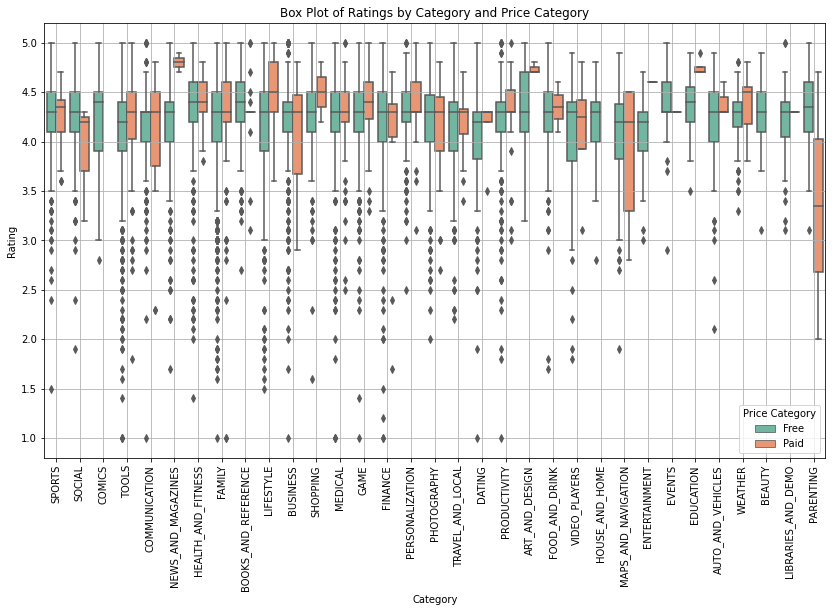

In [54]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Category', y='Rating', hue='Type', palette='Set2')
plt.xticks(rotation=90) 
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Category and Price Category')
plt.legend(title='Price Category')
plt.grid(True)
plt.show()

* Among the 3 biggest categories, FAMILY apps tend to be pricier than in TOOLS and GAME.
* Depending on the category, apps could perform better as Free or Paid.

### 2.2.4 Genres vs Price

In [55]:
price_by_genre = df_flat.groupby('Genres')['Price'].agg(['mean', 'median', 'min', 'max'])
sorted_by_mean = price_by_genre.sort_values(by='mean', ascending=False)

print("Price by Genre sorted by Mean Price:")
print(sorted_by_mean)

Price by Genre sorted by Mean Price:
                             mean  median  min     max
Genres                                                
Medical                  2.509797     0.0  0.0  200.00
Events                   1.718594     0.0  0.0  109.99
Role Playing             1.626435     0.0  0.0   19.99
Pretend Play             0.989420     0.0  0.0    4.99
Board                    0.865833     0.0  0.0    7.99
Adventure                0.835625     0.0  0.0    6.99
Productivity             0.670936     0.0  0.0  154.99
Action & Adventure       0.600306     0.0  0.0    6.99
Books & Reference        0.563333     0.0  0.0    6.49
Brain Games              0.560781     0.0  0.0    4.99
Strategy                 0.518788     0.0  0.0    9.99
Creativity               0.513636     0.0  0.0    3.99
Education                0.469381     0.0  0.0   39.99
Educational              0.460392     0.0  0.0    7.49
Photography              0.420925     0.0  0.0   29.99
Business                 0.4

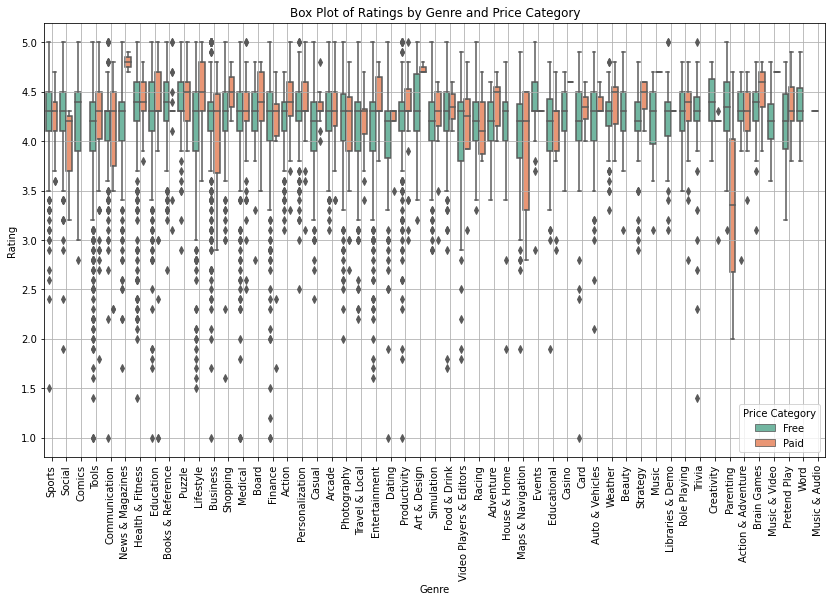

In [56]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_flat, x='Genres', y='Rating', hue='Type', palette='Set2')
plt.xticks(rotation=90) 
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Box Plot of Ratings by Genre and Price Category')
plt.legend(title='Price Category')
plt.grid(True)
plt.show()

* The most expensive genres include Medical (which may be linked to costly research and might not appear trustworthy if offered for free), Events (often associated with high-cost or large-scale events), Role Playing (RPG games typically offer hours of gameplay), Pretend Play, Board, Adventure, and Productivity.
* Depending on the genre, apps could perform better as Free or Paid.

### 2.2.5 Genres vs Size

In [57]:
size_by_genre = df_flat.groupby('Genres')['Size'].agg(['mean', 'median', 'min', 'max'])
size_sorted_by_mean = size_by_genre.sort_values(by='mean', ascending=False)

print("Size by Genre sorted by Mean Size:")
print(size_sorted_by_mean)

Size by Genre sorted by Mean Size:
                              mean     median       min    max
Genres                                                        
Role Playing             47.213167  47.000000  0.614258   99.0
Pretend Play             47.162319  47.000000  6.900000  100.0
Action                   46.512308  44.000000  0.627930  100.0
Strategy                 45.271717  41.000000  1.900000   98.0
Educational              44.183025  45.000000  0.768555   97.0
Racing                   44.156481  41.500000  4.600000  100.0
Simulation               43.050971  39.000000  2.900000  100.0
Action & Adventure       40.286735  28.000000  5.800000   99.0
Music                    37.627273  28.000000  4.400000   95.0
Arcade                   35.757789  31.000000  1.300000  100.0
Adventure                34.480000  29.500000  4.700000   99.0
Creativity               34.118182  24.000000  1.200000   85.0
Puzzle                   33.945805  25.500000  0.908203   99.0
Casual              

## 2.3 Rating vs other variables
### 2.3.1 Correlation matrix

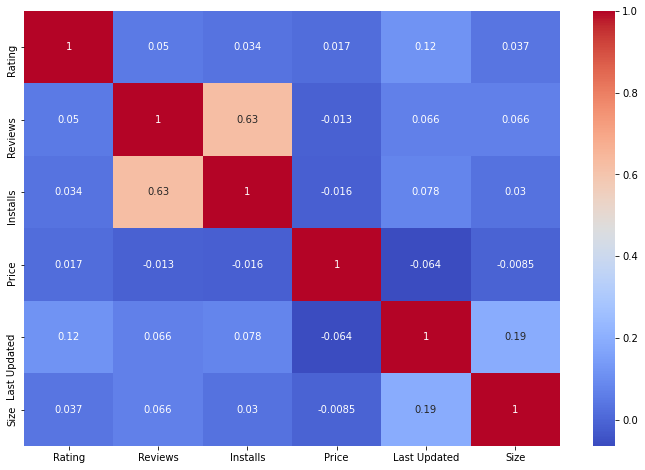

In [58]:
# correlation matrix
df_numeric_date = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]'])

corr = df_numeric_date.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

* As expected, the more installs an app has, the more reviews it receives.
* The rating slightly increases with the number of reviews and installs, the size of the app, and the recency of the last update.
* The price has a slight positive effect on the rating but a negative effect on other variables.
* Larger apps are updated slightly more frequently.

### 2.3.2 Rating vs Reviews, Size and Price

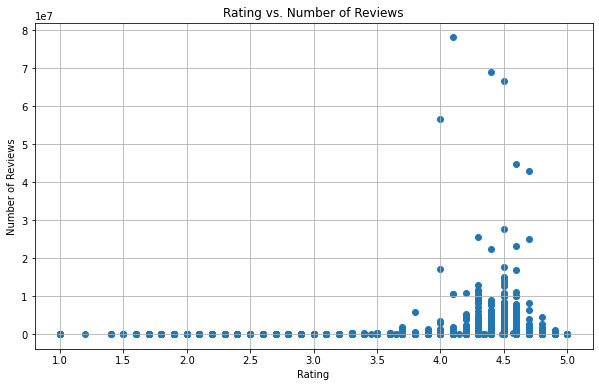

In [59]:
#Scatter plot Rating vs Reviews
plt.figure(figsize=(10, 6)) 
plt.scatter(x='Rating', y='Reviews', data=df)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating vs. Number of Reviews')
plt.grid(True)

plt.show()

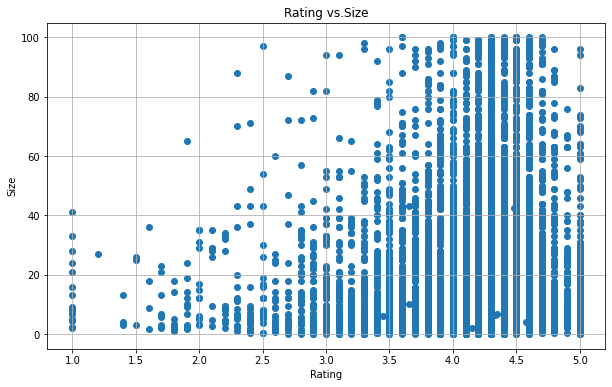

In [60]:
# Scatter plot Rating vs Size
plt.figure(figsize=(10, 6))
plt.scatter(x='Rating', y='Size', data=df)

plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating vs.Size')
plt.grid(True) 

plt.show()

While a high size could deter from installing apps (limited storage on mobile devices), most of the largest apps seem to be highly rated.

In [61]:
# Filter apps with rating 4.5 or above
highest_rating_df = df[df['Rating'] >= 4.5]

# Calculate average size
highest_rating_size = highest_rating_df['Size'].mean()

print(f"Average size of apps with rating 4.5 or above: {highest_rating_size:.2f}")

Average size of apps with rating 4.5 or above: 20.45


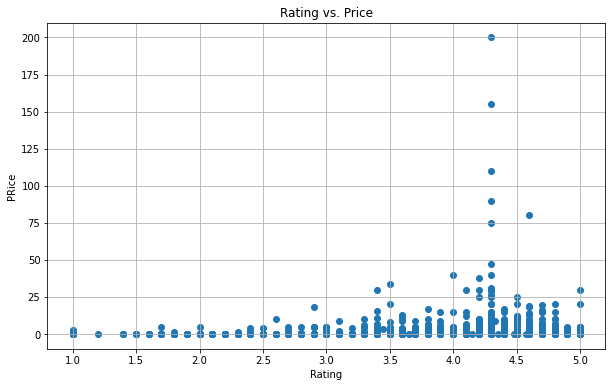

In [62]:
# Rating vs Price scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x='Rating', y='Price', data=df)


plt.xlabel('Rating')
plt.ylabel('PRice')
plt.title('Rating vs. Price')
plt.grid(True) 

plt.show()

In [63]:
# Prepare the data for an OLS Regression
X = df[['Reviews', 'Installs', 'Price']]
y = df['Rating']
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.133
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           4.95e-06
Time:                        08:50:30   Log-Likelihood:                -6921.1
No. Observations:                9643   AIC:                         1.385e+04
Df Residuals:                    9639   BIC:                         1.388e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1886      0.005    814.895      0.0

With a R-squared of 0,003, Reviews, Price and Installs don't explain much of the variation in Rating and building a model to predict Rating won't be possible.

# Conclusion

* The data has been thoroughly cleaned, structured, and enriched.

* Some anomalies in the data suggest potential inaccuracies. Further analysis of the scraping method or data accuracy is needed.

* The correspondence between Categories and Genres has been efficiently visualized.

* The best-rated categories and genres have been identified. Additionally, we have determined the likelihood of success for free versus paid apps, depending on their category and genre.


Overall, the rating does not seem to be influenced by other variables. However:
* Paid apps tend to have higher ratings, which slightly increase with price.
* Larger and more recently updated apps tend to have higher ratings.
* Apps with a higher number of installs and reviews tend to have higher ratings.